In [ ]:

# ####################### deberta-base with BiLSTM  #########################

In [ ]:
!pip install datasets
!pip install transformers
!pip install tensorflow transformers
!pip install transformers torch
!pip install flair==0.10
!pip install transformers==4.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 35.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3

In [ ]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)

print(y_train.shape)
print(y_test.shape)
print(y_vals.shape)


(1072, 4)
(153, 4)
(126, 4)


In [ ]:

%pip install flair

from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset

In [ ]:
# Extract documents from dataset
train_data = dataset['train']['tokens']
test_data = dataset['test']['tokens']
val_data = dataset['validation']['tokens']

In [ ]:
documents_train = [' '.join(sublist) for sublist in train_data]
documents_test = [' '.join(sublist) for sublist in test_data]
documents_val = [' '.join(sublist) for sublist in val_data]
print(documents_train)

['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .', 'The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respe

In [ ]:
# Extract labels from dataset
train_labels = dataset['train']['ner_tags']
test_labels = dataset['test']['ner_tags']
val_labels = dataset['validation']['ner_tags']


In [ ]:
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset



In [ ]:
# Initialize DeBERTa and Flair embeddings
deberta_embeddings = TransformerWordEmbeddings('microsoft/deberta-base')
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

2024-04-24 22:05:47,097 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

2024-04-24 22:06:01,150 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-forward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpx3o6h3_b


100%|██████████| 19689779/19689779 [00:01<00:00, 15284086.79B/s]

2024-04-24 22:06:02,836 copying /tmp/tmpx3o6h3_b to cache at /root/.flair/embeddings/lm-news-english-forward-1024-v0.2rc.pt
2024-04-24 22:06:02,859 removing temp file /tmp/tmpx3o6h3_b


2024-04-24 22:06:03,384 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-backward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpjko4q07u


100%|██████████| 19689779/19689779 [00:01<00:00, 13902929.87B/s]

2024-04-24 22:06:05,195 copying /tmp/tmpjko4q07u to cache at /root/.flair/embeddings/lm-news-english-backward-1024-v0.2rc.pt
2024-04-24 22:06:05,218 removing temp file /tmp/tmpjko4q07u


In [ ]:
# Stack embeddings
stacked_embeddings = StackedEmbeddings([deberta_embeddings, flair_forward, flair_backward])

In [ ]:
from flair.data import Sentence
import torch

def embed_documents(documents, max_length=512):
    embedded_docs = []
    for doc in documents:
        # Split document into words and truncate if necessary
        words = doc.split()
        if len(words) > max_length:
            words = words[:max_length]
        truncated_doc = ' '.join(words)
        sentence = Sentence(truncated_doc)
        stacked_embeddings.embed(sentence)
        # Stack embeddings and append
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return pad_sequence(embedded_docs, batch_first=True)


In [ ]:
# Embedding documents
train_embedded = embed_documents(documents_train)
test_embedded = embed_documents(documents_test)
val_embedded = embed_documents(documents_val)

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)



In [ ]:
import torch.nn as nn
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)  # Ensure the dimension is correctly calculated

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        # Apply the fully connected layer to every time step output
        output = self.fc(lstm_out)
        return output


In [ ]:
# Model initialization

from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

model = BiLSTM(embedding_dim=2816, hidden_dim=256, output_dim=4)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:

# Move the model to the specified device
model = model.to(device)

# Function to move tensors to the device
def move_to_device(tensor):
    return tensor.to(device)

# Update DataLoader setup to automatically move tensors to the device
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield (b[0].to(self.device), b[1].to(self.device))

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

train_loader = DeviceDataLoader(train_loader, device)
test_loader = DeviceDataLoader(test_loader, device)
val_loader = DeviceDataLoader(val_loader, device)


Epoch 1: Training Loss = 1.7010117252083385, Validation Loss = 0.350727915763855
Epoch 2: Training Loss = 0.28452006639803157, Validation Loss = 0.30713190138339996
Epoch 3: Training Loss = 0.20593597959069646, Validation Loss = 0.2940724194049835
Epoch 4: Training Loss = 0.1441751939847189, Validation Loss = 0.2809191606938839
Epoch 5: Training Loss = 0.10348377311054398, Validation Loss = 0.25002195686101913


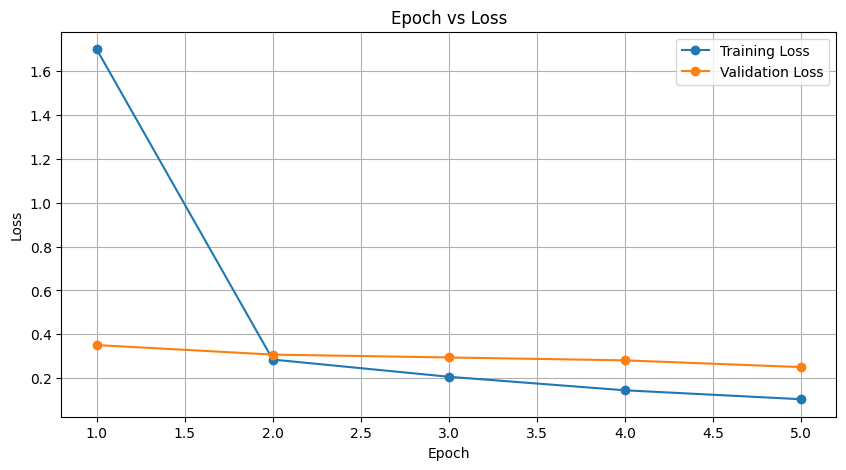

In [ ]:
import matplotlib.pyplot as plt

training_losses = []
validation_losses = []
model.train()

for epoch in range(5):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 6), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def evaluate_model(loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Evaluate on test and validation datasets
test_true, test_preds = evaluate_model(test_loader)
val_true, val_preds = evaluate_model(val_loader)

# Calculate performance metrics
test_accuracy = accuracy_score(test_true, test_preds)
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")




Test Accuracy: 0.7516
Validation Accuracy: 0.7302


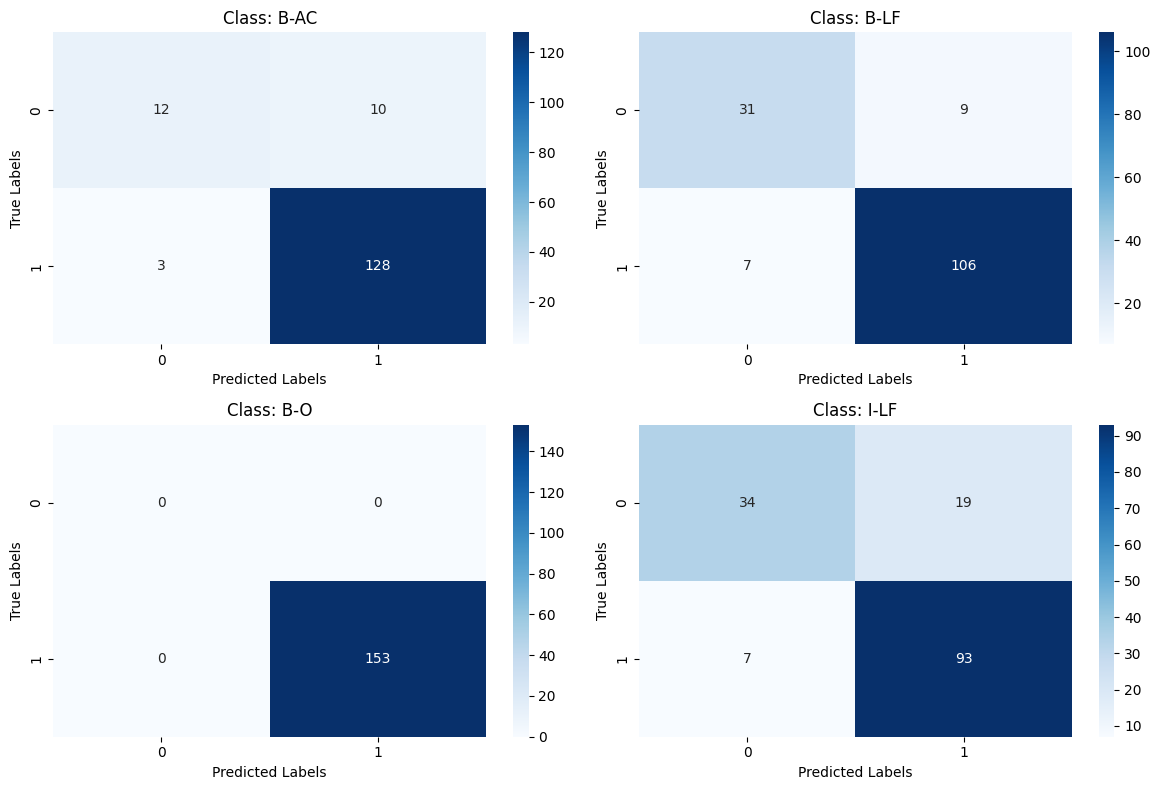

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds



import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

def plot_multilabel_confusion_matrix(cms, classes):
    # Determine the layout size: number of classes dictates the grid
    num_classes = len(classes)
    fig, axes = plt.subplots(nrows=int(np.ceil(num_classes / 3)), ncols=2, figsize=(12, num_classes * 2))
    axes = axes.flatten()

    # Plot each matrix
    for i, cm in enumerate(cms):
        if i < len(axes):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Class: {classes[i]}')
            axes[i].set_xlabel('Predicted Labels')
            axes[i].set_ylabel('True Labels')

    # Hide any unused axes in the grid
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
# Assuming test_preds and test_true are appropriately formatted for multilabel classification
test_cms = multilabel_confusion_matrix(test_true, test_preds)
plot_multilabel_confusion_matrix(test_cms, mlb.classes_)

In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.7516
Precision: 0.9199
Recall: 0.9613
F1 Score: 0.9397
              precision    recall  f1-score   support

        B-AC       0.93      0.98      0.95       131
        B-LF       0.92      0.94      0.93       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.83      0.93      0.88       100

   micro avg       0.93      0.97      0.95       497
   macro avg       0.92      0.96      0.94       497
weighted avg       0.93      0.97      0.95       497
 samples avg       0.93      0.97      0.93       497



In [ ]:
def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader)
print_metrics(val_true, val_preds, "Validation Data")

Test Data - Accuracy: 0.7516, Precision: 0.9199, Recall: 0.9613, F1 Score: 0.9397
              precision    recall  f1-score   support

        B-AC       0.93      0.98      0.95       131
        B-LF       0.92      0.94      0.93       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.83      0.93      0.88       100

   micro avg       0.93      0.97      0.95       497
   macro avg       0.92      0.96      0.94       497
weighted avg       0.93      0.97      0.95       497
 samples avg       0.93      0.97      0.93       497

Validation Data - Accuracy: 0.7302, Precision: 0.9227, Recall: 0.9515, F1 Score: 0.9365
              precision    recall  f1-score   support

        B-AC       0.94      0.97      0.96       116
        B-LF       0.92      0.92      0.92       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.83      0.91      0.87        90

   micro avg       0.93      0.96      0.94       433
   macro avg   

In [ ]:
# ####################### deberta-base with RNN #########################

In [ ]:

class RNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(embedding_dim, hidden_dim, bidirectional=False, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        rnn_out, _ = self.rnn(x)
        output = self.fc(rnn_out)
        return output

In [ ]:
# Model initialization

from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

model = RNN(embedding_dim=2816, hidden_dim=256, output_dim=4)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the specified device
model = model.to(device)

# Function to move tensors to the device
def move_to_device(tensor):
    return tensor.to(device)

# Update DataLoader setup to automatically move tensors to the device
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield (b[0].to(self.device), b[1].to(self.device))

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

train_loader = DeviceDataLoader(train_loader, device)
test_loader = DeviceDataLoader(test_loader, device)
val_loader = DeviceDataLoader(val_loader, device)



Epoch 1: Training Loss = 1.4216265818651985, Validation Loss = 0.35555606335401535
Epoch 2: Training Loss = 0.2957091699628269, Validation Loss = 0.3295634612441063
Epoch 3: Training Loss = 0.23021042171646566, Validation Loss = 0.30935783311724663
Epoch 4: Training Loss = 0.1834484496537377, Validation Loss = 0.34842806309461594
Epoch 5: Training Loss = 0.1558238149565809, Validation Loss = 0.3204021789133549


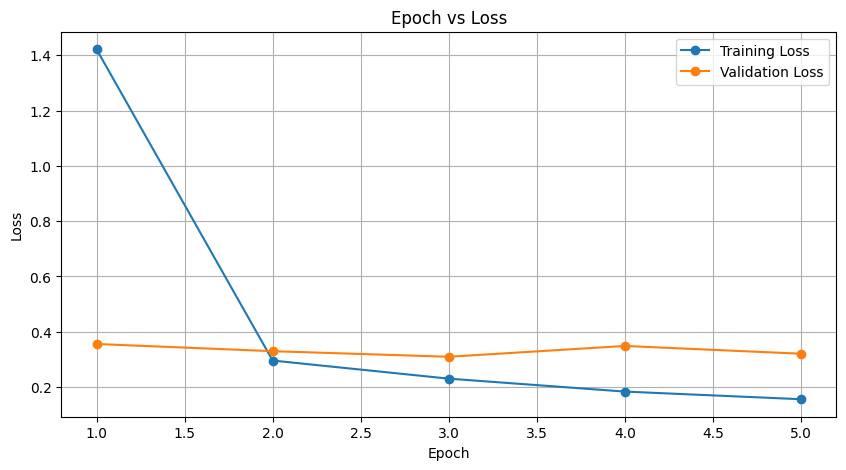

In [ ]:
import matplotlib.pyplot as plt

training_losses = []
validation_losses = []
model.train()

for epoch in range(5):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 6), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def evaluate_model(loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Evaluate on test and validation datasets
test_true, test_preds = evaluate_model(test_loader)
val_true, val_preds = evaluate_model(val_loader)

# Calculate performance metrics
test_accuracy = accuracy_score(test_true, test_preds)
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Test Accuracy: 0.6928
Validation Accuracy: 0.7381


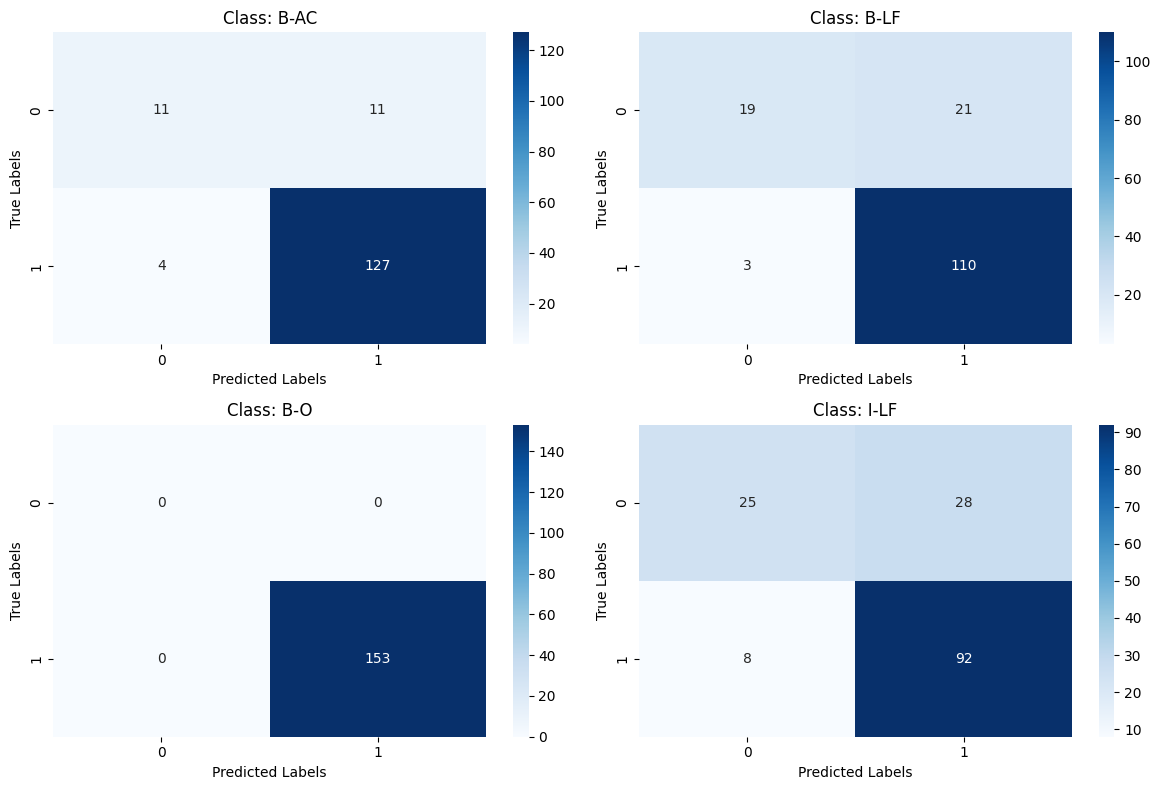

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds



import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

def plot_multilabel_confusion_matrix(cms, classes):
    # Determine the layout size: number of classes dictates the grid
    num_classes = len(classes)
    fig, axes = plt.subplots(nrows=int(np.ceil(num_classes / 3)), ncols=2, figsize=(12, num_classes * 2))
    axes = axes.flatten()

    # Plot each matrix
    for i, cm in enumerate(cms):
        if i < len(axes):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Class: {classes[i]}')
            axes[i].set_xlabel('Predicted Labels')
            axes[i].set_ylabel('True Labels')

    # Hide any unused axes in the grid
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
# Assuming test_preds and test_true are appropriately formatted for multilabel classification
test_cms = multilabel_confusion_matrix(test_true, test_preds)
plot_multilabel_confusion_matrix(test_cms, mlb.classes_)

In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.6928
Precision: 0.8817
Recall: 0.9657
F1 Score: 0.9206
              precision    recall  f1-score   support

        B-AC       0.92      0.97      0.94       131
        B-LF       0.84      0.97      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.77      0.92      0.84       100

   micro avg       0.89      0.97      0.93       497
   macro avg       0.88      0.97      0.92       497
weighted avg       0.90      0.97      0.93       497
 samples avg       0.89      0.97      0.91       497



In [ ]:
def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader)
print_metrics(val_true, val_preds, "Validation Data")

Test Data - Accuracy: 0.6928, Precision: 0.8817, Recall: 0.9657, F1 Score: 0.9206
              precision    recall  f1-score   support

        B-AC       0.92      0.97      0.94       131
        B-LF       0.84      0.97      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.77      0.92      0.84       100

   micro avg       0.89      0.97      0.93       497
   macro avg       0.88      0.97      0.92       497
weighted avg       0.90      0.97      0.93       497
 samples avg       0.89      0.97      0.91       497

Validation Data - Accuracy: 0.7381, Precision: 0.8975, Recall: 0.9602, F1 Score: 0.9268
              precision    recall  f1-score   support

        B-AC       0.94      0.97      0.95       116
        B-LF       0.85      0.93      0.89       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.79      0.94      0.86        90

   micro avg       0.90      0.96      0.93       433
   macro avg   

In [ ]:
import pandas as pd

# Data for the 'DeBERTa with BiLSTM' model on the test set.
deberta_bilstm_test_data = {
    'Model': 'DeBERTa + BiLSTM',
    'Data Type': 'Test',
    'Accuracy': 0.7516,
    'Precision': 0.9199,
    'Recall': 0.9613,
    'F1 Score': 0.9397
}

# Data for the 'DeBERTa with BiLSTM' model on the validation set.
deberta_bilstm_val_data = {
    'Model': 'DeBERTa + BiLSTM',
    'Data Type': 'Validation',
    'Accuracy': 0.7302,
    'Precision': 0.9227,
    'Recall': 0.9515,
    'F1 Score': 0.9365
}

# Data for the 'DeBERTa with RNN' model on the test set.
deberta_rnn_test_data = {
    'Model': 'DeBERTa + RNN',
    'Data Type': 'Test',
    'Accuracy': 0.6928,
    'Precision': 0.8817,
    'Recall': 0.9657,
    'F1 Score': 0.9206
}

# Data for the 'DeBERTa with RNN' model on the validation set.
deberta_rnn_val_data = {
    'Model': 'DeBERTa + RNN',
    'Data Type': 'Validation',
    'Accuracy': 0.7381,
    'Precision': 0.8975,
    'Recall': 0.9602,
    'F1 Score': 0.9268
}

# Combine all data into a DataFrame
comparison_df = pd.DataFrame([
    deberta_bilstm_test_data, deberta_bilstm_val_data,
    deberta_rnn_test_data, deberta_rnn_val_data
])

# Display the DataFrame
comparison_df


,Model,Data Type,Accuracy,Precision,Recall,F1 Score
0,DeBERTa + BiLSTM,Test,0.7516,0.9199,0.9613,0.9397
1,DeBERTa + BiLSTM,Validation,0.7302,0.9227,0.9515,0.9365
2,DeBERTa + RNN,Test,0.6928,0.8817,0.9657,0.9206
3,DeBERTa + RNN,Validation,0.7381,0.8975,0.9602,0.9268


In [ ]:
# Manually creating the comparison table with provided data

# DeBERTa with BiLSTM Test Data
deberta_bilstm_test = {
    "Accuracy": 0.7516,
    "Precision": 0.9199,
    "Recall": 0.9613,
    "F1 Score": 0.9397
}

# DeBERTa with BiLSTM Validation Data
deberta_bilstm_val = {
    "Accuracy": 0.7302,
    "Precision": 0.9227,
    "Recall": 0.9515,
    "F1 Score": 0.9365
}

# DeBERTa with RNN Test Data
deberta_rnn_test = {
    "Accuracy": 0.6928,
    "Precision": 0.8817,
    "Recall": 0.9657,
    "F1 Score": 0.9206
}

# DeBERTa with RNN Validation Data
deberta_rnn_val = {
    "Accuracy": 0.7381,
    "Precision": 0.8975,
    "Recall": 0.9602,
    "F1 Score": 0.9268
}

# Create a DataFrame for comparison
comparison_data = {
    "Model": ["DeBERTa + BiLSTM", "DeBERTa + BiLSTM", "DeBERTa + RNN", "DeBERTa + RNN"],
    "Dataset": ["Test", "Validation", "Test", "Validation"],
    "Accuracy": [deberta_bilstm_test["Accuracy"], deberta_bilstm_val["Accuracy"],
                 deberta_rnn_test["Accuracy"], deberta_rnn_val["Accuracy"]],
    "Precision": [deberta_bilstm_test["Precision"], deberta_bilstm_val["Precision"],
                  deberta_rnn_test["Precision"], deberta_rnn_val["Precision"]],
    "Recall": [deberta_bilstm_test["Recall"], deberta_bilstm_val["Recall"],
               deberta_rnn_test["Recall"], deberta_rnn_val["Recall"]],
    "F1 Score": [deberta_bilstm_test["F1 Score"], deberta_bilstm_val["F1 Score"],
                 deberta_rnn_test["F1 Score"], deberta_rnn_val["F1 Score"]]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df


,Model,Dataset,Accuracy,Precision,Recall,F1 Score
0,DeBERTa + BiLSTM,Test,0.7516,0.9199,0.9613,0.9397
1,DeBERTa + BiLSTM,Validation,0.7302,0.9227,0.9515,0.9365
2,DeBERTa + RNN,Test,0.6928,0.8817,0.9657,0.9206
3,DeBERTa + RNN,Validation,0.7381,0.8975,0.9602,0.9268
